## Importing the Required Libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the Dataset and Preprocessing it

In [50]:
df = pd.read_csv('train.csv')

In [51]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] + df['TotalBsmtSF'] + df['LowQualFinSF']
df['Bathrooms'] = df['BsmtFullBath']+df['BsmtHalfBath']+df['FullBath']+df['HalfBath']
df['Bedrooms'] = df['BedroomAbvGr']
df_train = df[['TotalSF', 'FullBath', 'HalfBath', 'Bedrooms', 'SalePrice']]
df_train = df_train.fillna(df_train.mean())
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [53]:
print("Shape of df_train:", df_train.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of df_train: (1460, 5)
Shape of X: (1460, 4)
Shape of y: (1460,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Regression Model

In [55]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Making prediction

In [56]:
y_pred = regressor.predict(X_test)

## Visualising the Results

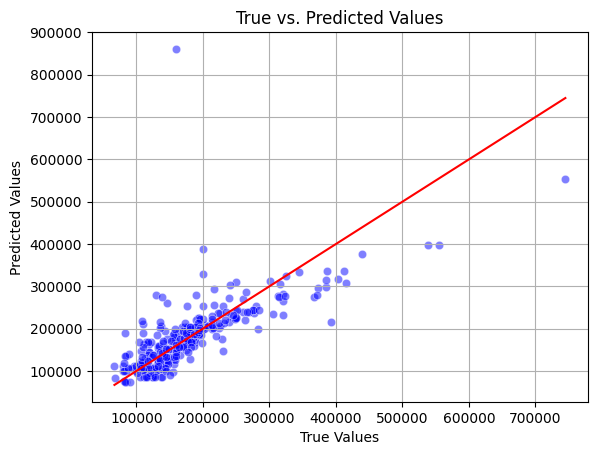

In [57]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()